In [117]:
import pandas as pd

In [118]:
df = pd.read_csv('data/Fish.csv')
#df.head()

In [119]:
perch_df = df.loc[df['Species'] == 'Perch']
#perch_df.head()

In [120]:
perch_full = perch_df[['Length2', 'Height', 'Width']]
perch_weight = perch_df[['Weight']]

In [121]:
perch_weight.head()

,Weight
72,5.9
73,32.0
74,40.0
75,51.5
76,70.0


In [122]:
from sklearn.model_selection import train_test_split

In [123]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [124]:
train_input.shape

(42, 3)

In [125]:
from sklearn.preprocessing import PolynomialFeatures

In [126]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[3, 5]])
poly.transform([[3, 5]])

array([[ 3.,  5.,  9., 15., 25.]])

In [127]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
#train_poly.shape
train_poly.shape

(42, 9)

In [128]:
poly.get_feature_names_out()

array(['Length2', 'Height', 'Width', 'Length2^2', 'Length2 Height',
       'Length2 Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [129]:
test_poly = poly.transform(test_input)

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9903557670312703

In [132]:
lr.score(test_poly, test_target)

0.971237620746181

In [133]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [134]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999994075

In [135]:
lr.score(test_poly, test_target)

-129.88033371789092

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
# train_scaled[:5]
# tra.shape

규제의 종류

- 릿지 : 계수를 제곱한 값을 기준으로 규제
    - L2 norm : 모든 계수를 작게 만들지마느 0은 되지 않음.

- 라쏘: 계수의 절대값을 기준으로 규제

      - L1 norm : 불필요한 특성의 가중치를 0으로 만듦

In [138]:
print(train_scaled.shape, train_target.shape)

(42, 55) (42, 1)


In [139]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896217956447125

In [142]:
ridge.score(train_scaled, train_target)

0.9896217956447125

In [152]:
import matplotlib.pyplot as plt

In [153]:
train_score = []
test_score = []

In [154]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)

train_score.append(ridge.score(train_scaled, train_target))
test_score.append(ridge.score(test_scaled, test_target))


ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

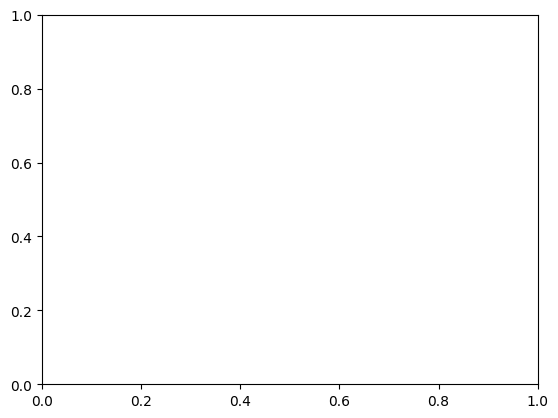

In [155]:
import numpy as np
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
ridge= Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

ridge.score(train_scaled, train_target)
ridge.score(test_scaled, test_target)


In [67]:
from sklearn.linear_model import Lasso

In [68]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

lasso.score(train_scaled, train_target)

ValueError: Found input variables with inconsistent numbers of samples: [14, 42]

In [69]:
lasso.coef_

AttributeError: 'Lasso' object has no attribute 'coef_'